# Evaluate Simple linear Regression

In this activity, I will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, I will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, I have to provides insights about marketing and sales.I have been assigned to a project that focuses on the use of influencer marketing, and I would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in the company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

## Import packages

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load the dataset

Load the provided dataset `modified_marketing_and_sales_data.csv` as `data` and display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity.

In [4]:
# Load the data.
data = pd.read_csv('Data//marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Data exploration


The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, I'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Question:** What are some reasons for conducting an EDA before constructing a simple linear regression model?

Potential reasons include:

* Understanding which variables are present in the data
* Reviewing the distribution of features, such as minimum, mean, and maximum values
* Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X
* Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

In [5]:
# Display the shape of the data as a tuple (rows, columns).
data.shape

(572, 5)

### Explore the independent variables

In [7]:
# Generate descriptive statistics about data

data.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.646472,3.248471,193.516937
std,9.650740,2.195696,90.516153
min,0.194576,0.013230,31.199409
25%,10.878554,1.447163,118.544562
50%,18.810430,2.945318,198.521410
75%,25.838296,4.791290,268.567987
max,48.871161,11.260430,358.420739


### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [13]:
# Calculate the average missing rate in the sales column.
missing_sales = data.Sales.isna().sum()
print(f"Number of promotions missing Sales: {missing_sales}")

Number of promotions missing Sales: 1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


### Remove the missing data

In [14]:
# Remove the rows with missing Sales
data = data.dropna(subset = ['Sales'], axis = 0)

### Visualize the sales distribution

In [18]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

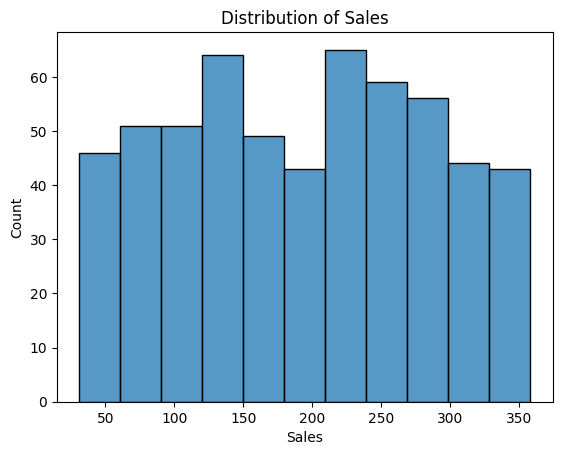

In [20]:
# Create a histogram of the Sales.
fig = sns.histplot(data['Sales'])
fig.set_title('Distribution of Sales');

Generally, `Sales` are equally distributed between 25 and 350 million. 

## Model building

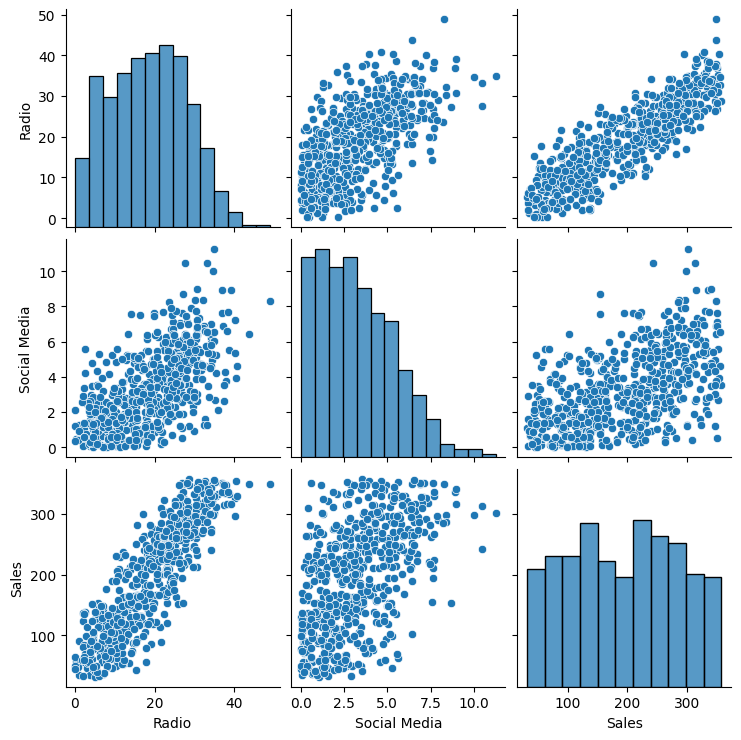

In [21]:
# Create a pairplot of the data.
sns.pairplot(data);

**Question:** Which variable did you select for X? Why?

`Radio` clearly has the strongest linear relationship with `Sales`. You could draw a straight line through the scatterplot of `Radio` and `Sales` that confidently estimates `Sales` using `Radio`. `Radio` and `Sales` appear to have a linear relationship, but there is larger variance than between `TV` and `Sales`.

### Build and fit the model

In [22]:
# Define and fit the model.
ols_formula = 'Sales ~ Radio'

OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1781.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          2.96e-177
Time:                        13:12:31   Log-Likelihood:                -2971.5
No. Observations:                 570   AIC:                             5947.
Df Residuals:                     568   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4488      4.061     10.206      0.000      33.472      49.426
Radio          8.1799      0.194     42.206      0.000       7.799       8.561
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.236
Skew:                          -0.105   Prob(JB):                        0.327
Kurtosis:                       2.776   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable.

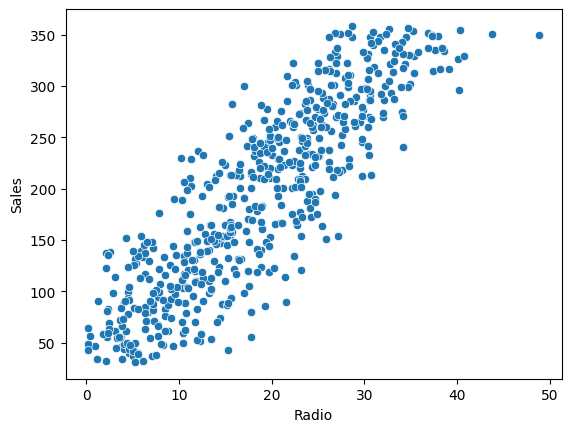

In [25]:
# Create a scatterplot comparing X and Sales (Y).
sns.scatterplot(x = data['Radio'], y = data['Sales']);

**QUESTION:** Is the linearity assumption met?

There is a clear linear relationship between `Radio` and `Sales`, meeting the linearity assumption.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The **normality assumption** states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

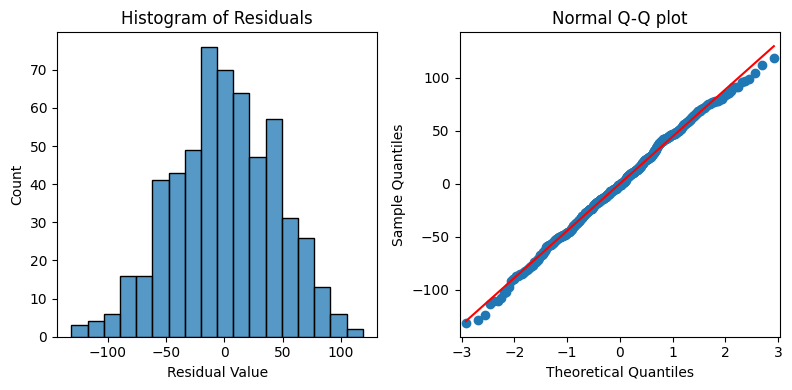

In [26]:
# Calculate the residuals.

residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals .
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
plt.show()

**Question:** Is the normality assumption met?

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

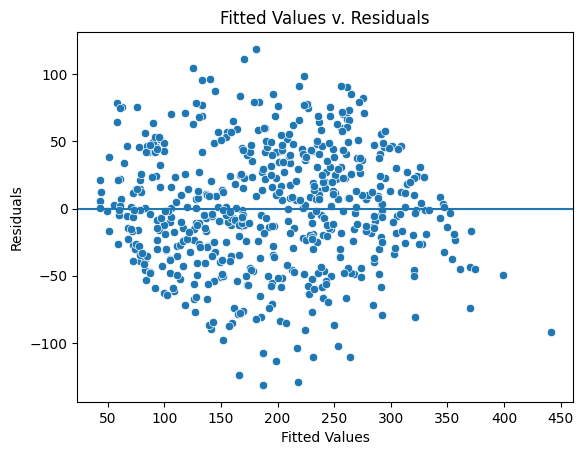

In [27]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)
plt.show()

**QUESTION:** Is the homoscedasticity assumption met?

The variance of the residuals is consistant across all $X$. Thus, the assumption of homoscedasticity is met.

## Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [28]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1781.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          2.96e-177
Time:                        13:12:31   Log-Likelihood:                -2971.5
No. Observations:                 570   AIC:                             5947.
Df Residuals:                     568   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4488      4.061     10.206      0.000      33.472      49.426
Radio          8.1799      0.194     42.206      0.000       7.799       8.561
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.236
Skew:                          -0.105   Prob(JB):                        0.327
Kurtosis:                       2.776   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?

Using `Radio` as X results in a simple linear regression model with $R^{2} = 0.75$. In other words, `Radio` explains $75.8\%$ of the variation in `Sales`.

The R-squared value will depend on the variable selected for X. 


### Interpret the model results

With the model fit evaluated, I can assess the coefficient estimates and the uncertainty of these estimates.

**Question:** Based on the preceding model results, what do you observe about the coefficients?<br>
When `Radio` is used as the independent variable X, the coefficient for the `Intercept` is 41.44 and the coefficient for `Radio` is 8.17. 

**Question:** How would you write the relationship between X and `Sales` in the form of a linear equation?

When `Radio` is used as the independent variable X, the linear equation is:<br>
$Y = \text{Intercept} + \text{Slope} * X$<br>
$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$<br>
$\text{Sales (in millions)} = 41.44 + 8.17 * \text{TV (in millions)}$<br>


**Question:** Based on this model, what is your interpretation of the relationship between X and `Sales`?<br>
According to the model, when `Radio` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 8.17 million dollars more in sales.

**Question:** Why is it important to interpret the beta coefficients?<br>
Beta coefficients allow us to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in Radio promotional budgets and sales mentioned previously.

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

In [29]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1781.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          2.96e-177
Time:                        13:12:31   Log-Likelihood:                -2971.5
No. Observations:                 570   AIC:                             5947.
Df Residuals:                     568   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4488      4.061     10.206      0.000      33.472      49.426
Radio          8.1799      0.194     42.206      0.000       7.799       8.561
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.236
Skew:                          -0.105   Prob(JB):                        0.327
Kurtosis:                       2.776   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?

When `Radio` is used as the independent variable, it has a p-value of $0.000$ and a $95\%$ confidence interval of $[7.799, 8.561]$. This means there is a $95\%$ chance the interval $[7.799, 8.561]$ contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `Radio` has on `Sales`.

**Question:** Based on this model, what are you interested in exploring?

Potential areas to explore include:

* Providing the business with the estimated sales given different TV promotional budgets
* Using both `TV` and `Radio` as independent variables
* Adding plots to help convey the results, such as using the `seaborn` `regplot()` to plot the data with a best fit regression line